In [1]:
import requests
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

#Lectura de los dataframe y asignacion de las variables

df_Burgos = pd.read_csv("../Proyecto AEMET/Data/burgos.csv")
df_Barcelona = pd.read_csv("../Proyecto AEMET/Data/barcelona.csv")
df_Las_Palmas = pd.read_csv("../Proyecto AEMET/Data/las_palmas.csv")


In [2]:
df_Burgos

,indicativo,fecha,Temperatura Maxima,Temperatura Minima,Cantidad dias de lluvia,w_racha,hr,p_mes
0,2331,2005-01-01,12.8,-9.4,3,5,87.0,29.3
1,2331,2005-02-01,12.7,-9.2,7,8,78.0,9.0
2,2331,2005-03-01,22.8,-12.0,7,27,66.0,16.9
3,2331,2005-04-01,27.0,-1.8,17,1,71.0,61.9
4,2331,2005-05-01,30.7,1.0,8,25,63.0,38.6
...,...,...,...,...,...,...,...,...
235,2331,2024-08-01,37.6,6.9,7,25,53.0,50.2
236,2331,2024-09-01,26.0,2.8,16,21,68.0,28.0
237,2331,2024-10-01,23.9,1.7,19,20,84.0,147.0
238,2331,2024-11-01,19.9,-1.4,8,18,84.0,22.2


In [3]:
df_Barcelona

,indicativo,fecha,Temperatura Maxima,Temperatura Minima,Cantidad dias de lluvia,w_racha,hr,p_mes
0,76,2005-01-01,18.7,-1.1,0.0,33.00,61.0,0.0
1,76,2005-02-01,20.1,0.4,9.0,30.00,61.0,25.2
2,76,2005-03-01,23.0,0.0,6.0,34.00,70.0,17.2
3,76,2005-04-01,23.2,7.4,2.0,8.00,65.0,4.2
4,76,2005-05-01,26.3,11.7,12.0,22.00,63.0,38.2
...,...,...,...,...,...,...,...,...
235,76,2024-08-01,32.3,20.1,4.0,33.00,66.0,10.0
236,76,2024-09-01,29.4,13.5,13.0,1.00,65.0,99.2
237,76,2024-10-01,26.6,11.7,11.0,10.67,76.0,115.7
238,76,2024-11-01,23.1,7.3,9.0,20.33,75.0,175.1


In [4]:
df_Las_Palmas

,indicativo,fecha,Temperatura Maxima,Temperatura Minima,Cantidad dias de lluvia,w_racha,hr,p_mes
0,C649I,2005-01-01,22.6,12.0,6,2.0,56.0,15.0
1,C649I,2005-02-01,22.8,11.3,16,22.0,62.0,102.9
2,C649I,2005-03-01,27.8,12.1,5,21.0,66.0,16.7
3,C649I,2005-04-01,24.5,14.4,3,1.0,61.0,2.1
4,C649I,2005-05-01,26.3,16.5,4,3.0,62.0,0.0
...,...,...,...,...,...,...,...,...
235,C649I,2024-08-01,34.8,21.4,0,99.0,67.0,0.0
236,C649I,2024-09-01,28.6,19.8,2,1.0,66.0,0.0
237,C649I,2024-10-01,29.4,17.5,9,2.0,71.0,7.5
238,C649I,2024-11-01,31.9,17.0,5,1.0,63.0,6.9


In [5]:
df_Ciudades_total = pd.concat([df_Burgos, df_Barcelona, df_Las_Palmas], ignore_index=True)

In [6]:
suma_p_mes_burgos=int(df_Burgos["p_mes"].sum())
suma_dias_lluvia_burgos=int(df_Burgos["Cantidad dias de lluvia"].sum())
suma_p_mes_burgos,suma_dias_lluvia_burgos

(10508, 2575)

In [7]:
suma_p_mes_las_palmas=int(df_Las_Palmas["p_mes"].sum())
suma_dias_lluvia_lp=int(df_Las_Palmas["Cantidad dias de lluvia"].sum())
suma_p_mes_las_palmas,suma_dias_lluvia_lp

(2480, 1078)

In [8]:
suma_p_mes_barcelona=int(df_Barcelona["p_mes"].sum())
suma_dias_lluvia_barcelona=int(df_Barcelona["Cantidad dias de lluvia"].sum())
suma_p_mes_barcelona,suma_dias_lluvia_barcelona

(10226, 1706)

In [9]:
#Lectura y creacion variables para valores medios, maximos y minimos de Burgos

burgos_medios = pd.read_csv("../Proyecto AEMET/Data/burgos_medios.csv")
burgos_maximos = pd.read_csv("../Proyecto AEMET/Data/burgos_maximos.csv")
burgos_minimos = pd.read_csv("../Proyecto AEMET/Data/burgos_minimos.csv")

#Lectura y creacion variables para valores medios, maximos y minimos de Barcelona

barcelona_medios = pd.read_csv("../Proyecto AEMET/Data/barcelona_medios.csv")
barcelona_maximos = pd.read_csv("../Proyecto AEMET/Data/barcelona_maximos.csv")
barcelona_minimos = pd.read_csv("../Proyecto AEMET/Data/barcelona_minimos.csv")

#Lectura y creacion variables para valores medios, maximos y minimos de Las Palmas

Las_Palmas_medios = pd.read_csv("../Proyecto AEMET/Data/las_palmas_medios.csv")
Las_Palmas_maximos = pd.read_csv("../Proyecto AEMET/Data/las_palmas_maximos.csv")
Las_Palmas_minimos = pd.read_csv("../Proyecto AEMET/Data/las_palmas_minimos.csv")

In [29]:
df_medios_totales = pd.concat([burgos_medios, barcelona_medios, Las_Palmas_medios], ignore_index=True)

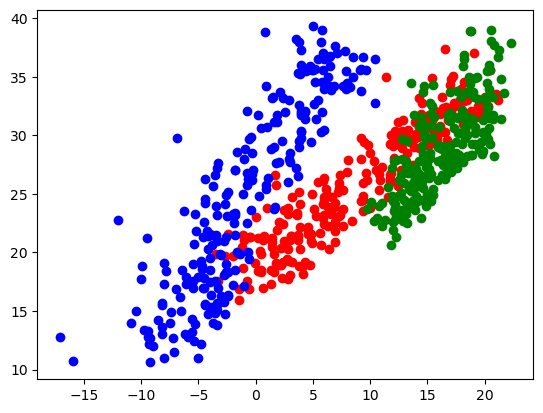

In [10]:
#Grafico de dispersion de minimas y maximas


plt.scatter(x = df_Barcelona["Temperatura Minima"], y = df_Barcelona ["Temperatura Maxima"], color = "red")
plt.scatter(x = df_Burgos["Temperatura Minima"], y = df_Burgos ["Temperatura Maxima"], color = "blue")
plt.scatter(x = df_Las_Palmas["Temperatura Minima"], y = df_Las_Palmas["Temperatura Maxima"], color = "green")

plt.show()

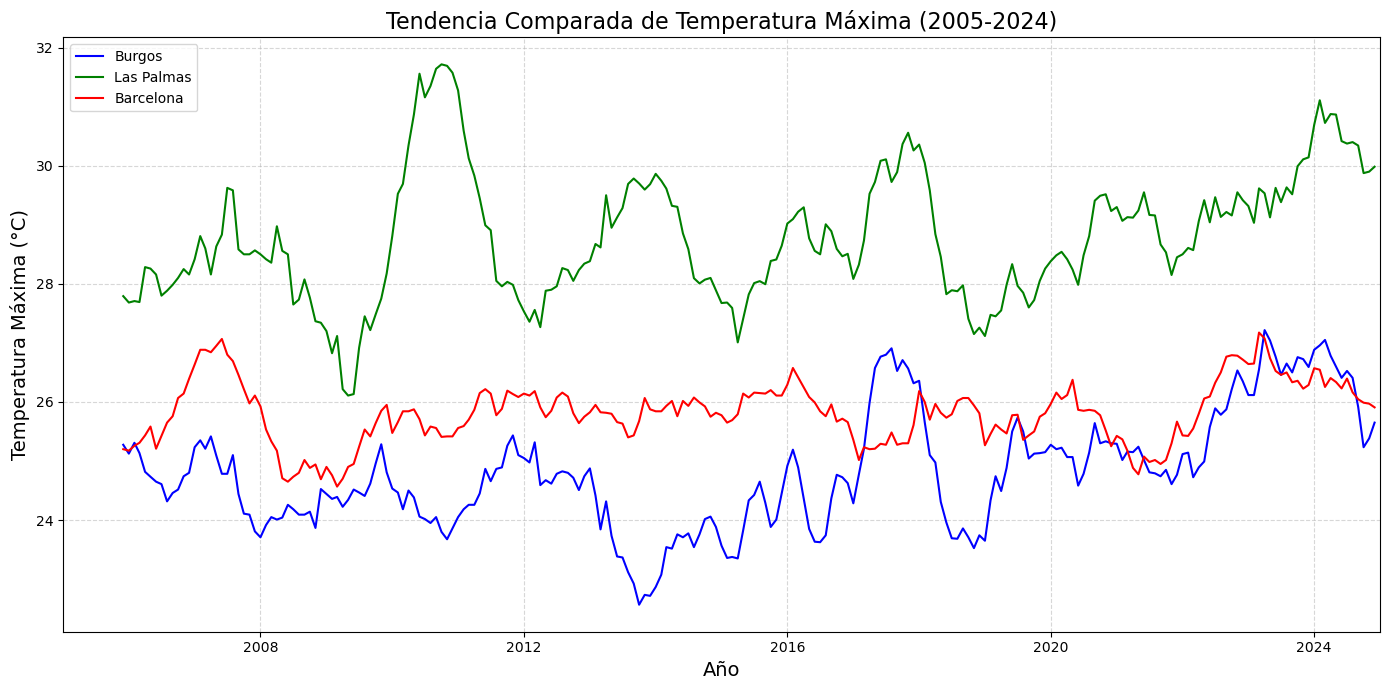

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

#Calculo de la tendencia en maximas hasta la actualidad. Con esto podemos observar que realmente hay aumento de las temperaturas a lo largo de los años.

df_Burgos['fecha'] = pd.to_datetime(df_Burgos['fecha'])
df1= df_Burgos.set_index('fecha')
df_Barcelona['fecha'] = pd.to_datetime(df_Barcelona['fecha'])
df2= df_Barcelona.set_index('fecha')
df_Las_Palmas['fecha'] = pd.to_datetime(df_Las_Palmas['fecha'])
df3 = df_Las_Palmas.set_index('fecha')

mm_burgos = df1["Temperatura Maxima"].rolling(window=12).mean()
mm_barcelona = df2["Temperatura Maxima"].rolling(window=12).mean()
mm_las_palmas = df3["Temperatura Maxima"].rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(14, 7)) 
ax.plot(mm_burgos.index, mm_burgos.values, 
        label="Burgos", 
        color="blue", 
        linewidth=1.5)

ax.plot(mm_las_palmas.index, mm_las_palmas.values, 
        label="Las Palmas", 
        color="green", 
        linewidth=1.5)

ax.plot(mm_barcelona.index, mm_barcelona.values, 
        label="Barcelona", 
        color="red", 
        linewidth=1.5)

ax.xaxis.set_major_locator(mdates.YearLocator(4)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fecha_inicio = pd.to_datetime('2005-01-01')
fecha_fin = pd.to_datetime('2024-12-31')
ax.set_xlim(fecha_inicio, fecha_fin)

ax.set_title(f"Tendencia Comparada de Temperatura Máxima (2005-2024)", fontsize=16)
ax.set_xlabel("Año", fontsize=14)
ax.set_ylabel("Temperatura Máxima (°C)", fontsize=14)
ax.legend(loc='best', fontsize=10)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

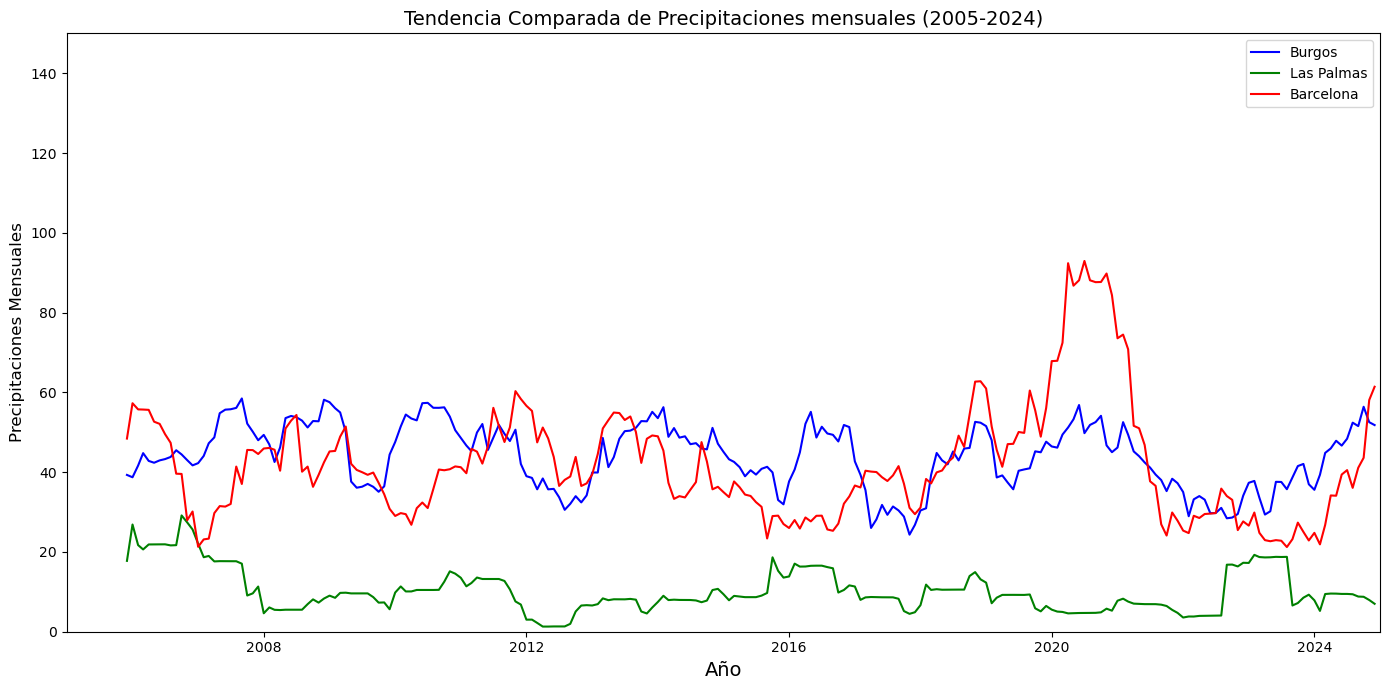

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

#Calculo de la tendencia de precipitaciones mensuales. Comprobamos si .

df_Burgos["fecha"] = pd.to_datetime(df_Burgos["fecha"])
df1= df_Burgos.set_index("fecha")
df_Barcelona["fecha"] = pd.to_datetime(df_Barcelona["fecha"])
df2= df_Barcelona.set_index("fecha")
df_Las_Palmas["fecha"] = pd.to_datetime(df_Las_Palmas["fecha"])
df3 = df_Las_Palmas.set_index("fecha")

mm_burgos_lluvia = df1["p_mes"].rolling(window=12).mean()
mm_barcelona_lluvia = df2["p_mes"].rolling(window=12).mean()
mm_las_palmas_lluvia = df3["p_mes"].rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(14, 7)) 

ax.plot(mm_burgos_lluvia.index, mm_burgos_lluvia.values, 
        label="Burgos", 
        color="blue", 
        linewidth=1.5)

ax.plot(mm_las_palmas_lluvia.index, mm_las_palmas_lluvia.values, 
        label="Las Palmas", 
        color="green", 
        linewidth=1.5)

ax.plot(mm_barcelona_lluvia.index, mm_barcelona_lluvia.values, 
        label="Barcelona", 
        color="red", 
        linewidth=1.5)

ax.xaxis.set_major_locator(mdates.YearLocator(4)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fecha_inicio = pd.to_datetime('2005-01-01')
fecha_fin = pd.to_datetime('2024-12-31')
ax.set_xlim(fecha_inicio, fecha_fin)
ax.set_ylim(0, 150)
ax.set_title(f"Tendencia Comparada de Precipitaciones mensuales (2005-2024)", fontsize=14)
ax.set_xlabel("Año", fontsize=14)
ax.set_ylabel("Precipitaciones Mensuales", fontsize=12)
ax.legend(loc='best', fontsize=10)

plt.tight_layout()
plt.show()

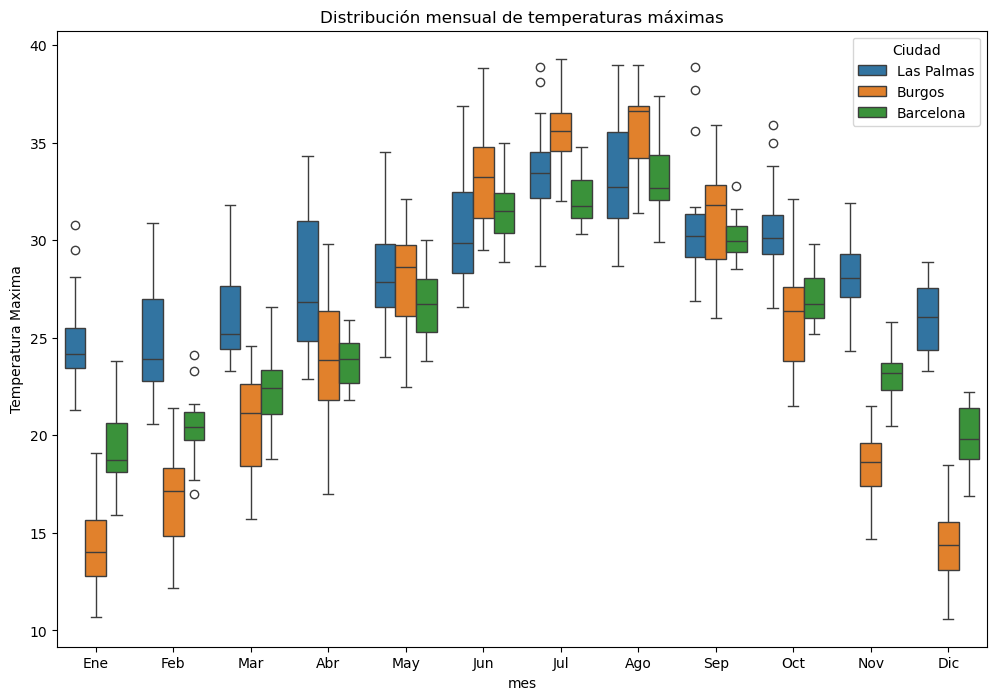

In [54]:
import seaborn as sns

df_Las_Palmas['Ciudad'] = "Las Palmas"
df_Burgos['Ciudad'] = "Burgos"
df_Barcelona['Ciudad'] = "Barcelona"

df_total = pd.concat([df_Las_Palmas, df_Burgos, df_Barcelona])
df_total['mes'] = df_total['fecha'].dt.month

plt.figure(figsize=(12,8))
sns.boxplot(x="mes", y="Temperatura Maxima", hue="Ciudad", data=df_total)
plt.xticks(range(0,12), ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"])
plt.title("Distribución mensual de temperaturas máximas")

plt.show()

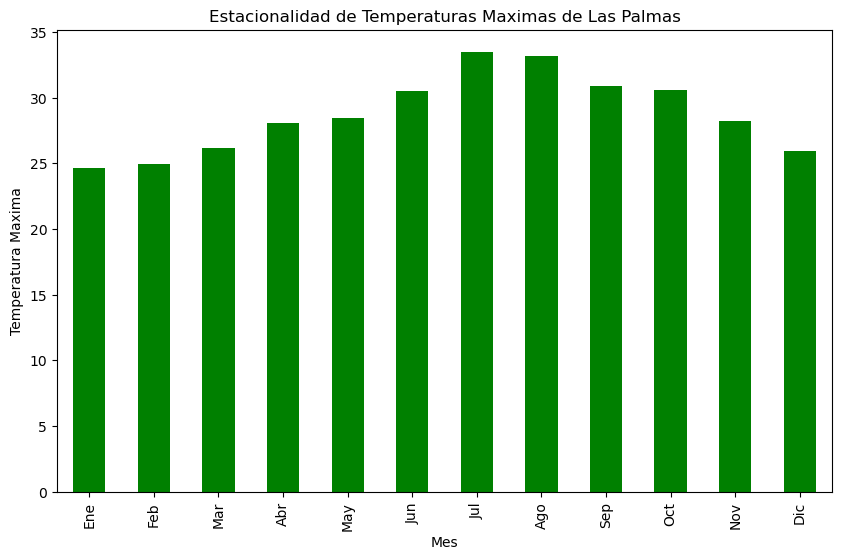

In [57]:
df_Las_Palmas['mes'] = df_Las_Palmas['fecha'].dt.month
   
estacionalidad = df_Las_Palmas.groupby('mes')["Temperatura Maxima"].mean()  
    
plt.figure(figsize=(10,6))
estacionalidad.plot(kind='bar', color='green')
plt.title("Estacionalidad de Temperaturas Maximas de Las Palmas")
plt.xlabel("Mes")
plt.ylabel("Temperatura Maxima")
plt.xticks(range(0,12),["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"])
plt.show()

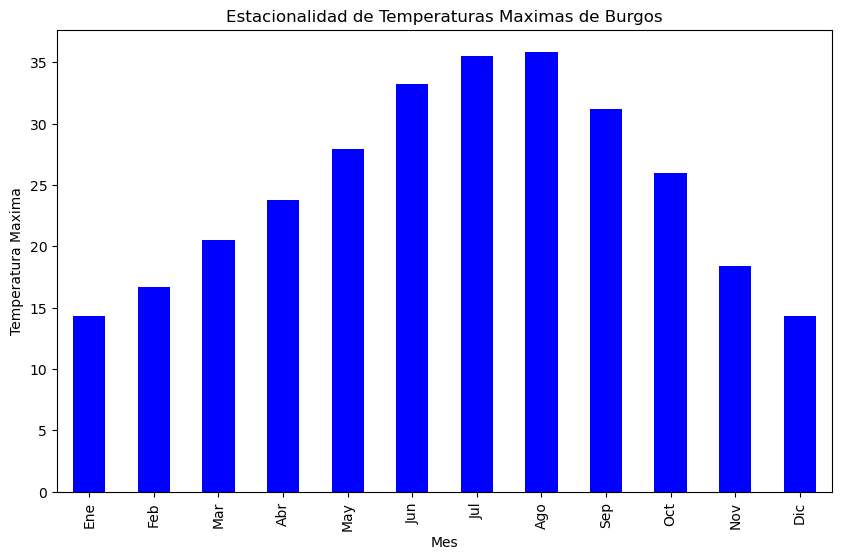

In [58]:
df_Burgos['mes'] = df_Burgos['fecha'].dt.month
   
estacionalidad = df_Burgos.groupby('mes')["Temperatura Maxima"].mean()  
    
plt.figure(figsize=(10,6))
estacionalidad.plot(kind='bar', color='blue')
plt.title("Estacionalidad de Temperaturas Maximas de Burgos")
plt.xlabel("Mes")
plt.ylabel("Temperatura Maxima")
plt.xticks(range(0,12),["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"])
plt.show()

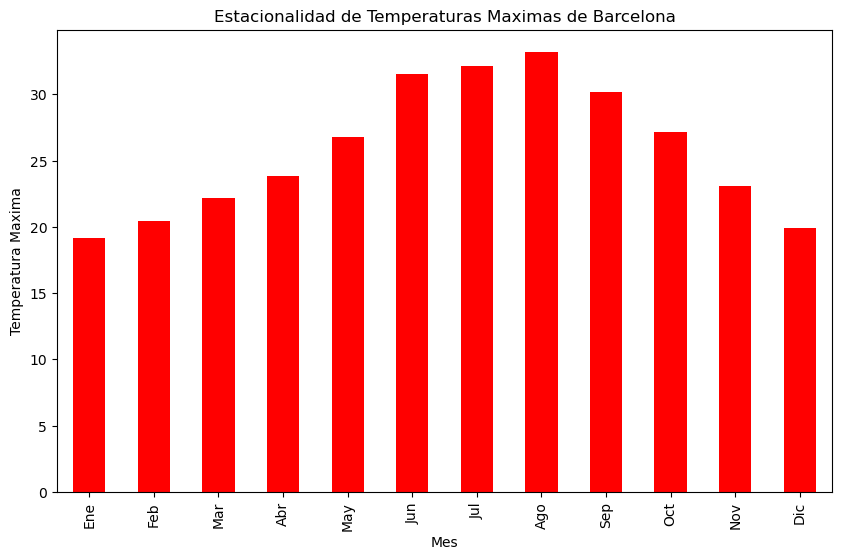

In [59]:
df_Barcelona['mes'] = df_Barcelona['fecha'].dt.month
   
estacionalidad = df_Barcelona.groupby('mes')["Temperatura Maxima"].mean()  
    
plt.figure(figsize=(10,6))
estacionalidad.plot(kind='bar', color='red')
plt.title("Estacionalidad de Temperaturas Maximas de Barcelona")
plt.xlabel("Mes")
plt.ylabel("Temperatura Maxima")
plt.xticks(range(0,12),["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"])
plt.show()

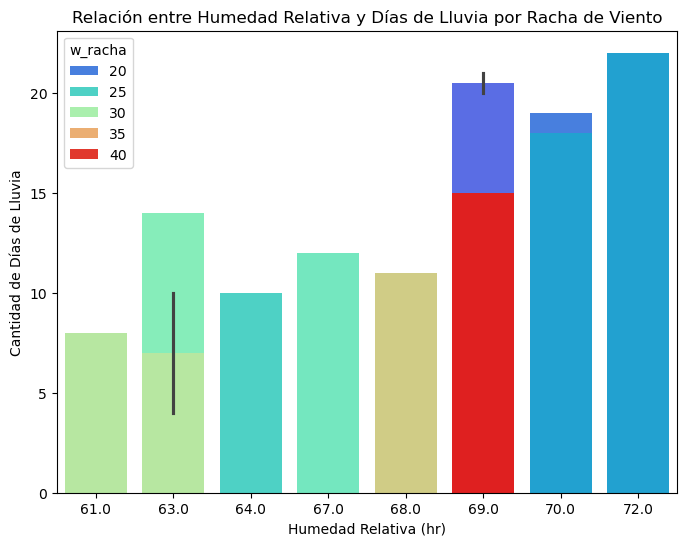

In [67]:

import seaborn as sns

fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(x = "hr", y = "Cantidad dias de lluvia", hue = "w_racha", data = df_medios_totales,  palette = "rainbow", dodge=False)

plt.title("Relación entre Humedad Relativa y Días de Lluvia por Racha de Viento") # Título descriptivo
plt.xlabel("Humedad Relativa (hr)")
plt.ylabel("Cantidad de Días de Lluvia")

plt.show()

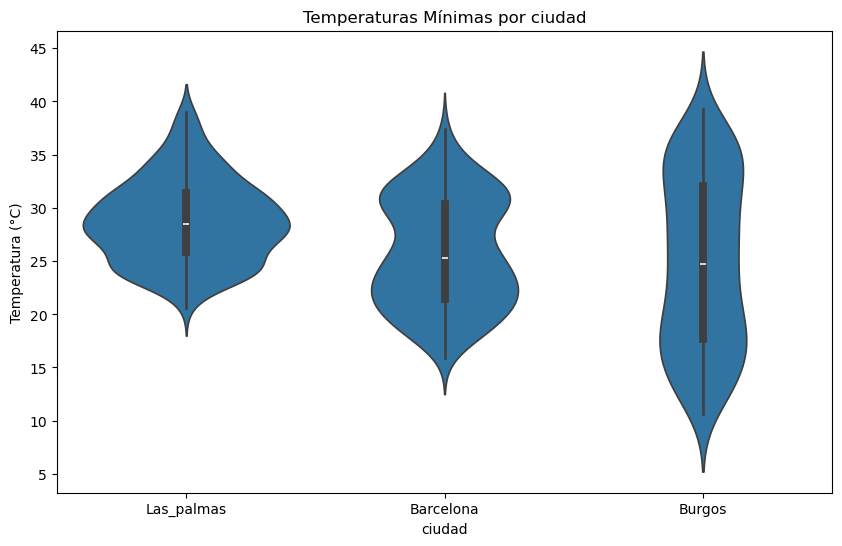

In [ ]:
#Gráfico de violín de temperaturas máximas.

df_total = pd.concat([df_Las_Palmas.assign(ciudad="Las_palmas"), df_Barcelona.assign(ciudad= "Barcelona"), df_Burgos.assign(ciudad="Burgos")])

plt.figure(figsize=(10, 6))
sns.violinplot(x="ciudad", y="Temperatura Maxima", data=df_total)
plt.title("Temperaturas Mínimas por ciudad")
plt.xlabel("ciudad")
plt.ylabel("Temperatura (°C)")
plt.show()

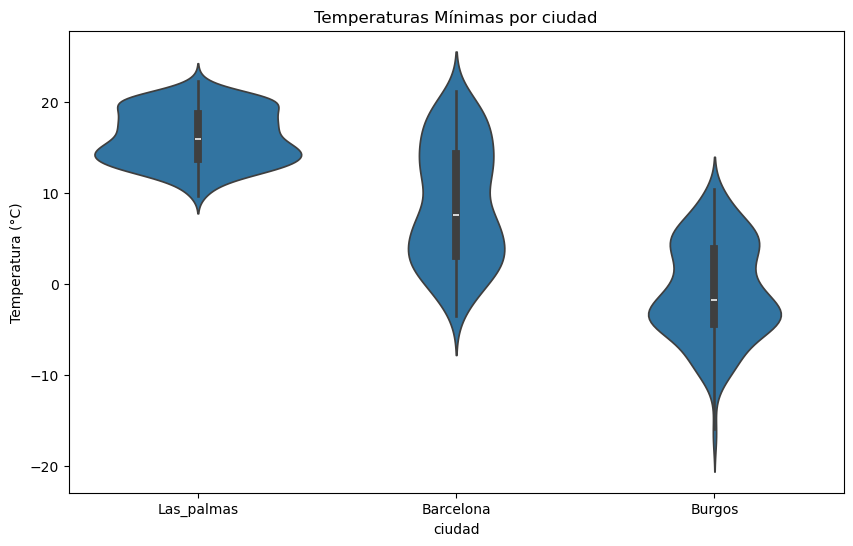

In [ ]:
#grafico de violín de temperaturas mínimas.

df_total = pd.concat([df_Las_Palmas.assign(ciudad="Las_palmas"), df_Barcelona.assign(ciudad= "Barcelona"), df_Burgos.assign(ciudad="Burgos")])

plt.figure(figsize=(10, 6))

sns.violinplot(x="ciudad", y="Temperatura Minima", data=df_total)
plt.title("Temperaturas Mínimas por ciudad")
plt.xlabel("ciudad")
plt.ylabel("Temperatura (°C)")

plt.show()